Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import jenkspy

Import/Read CSV Files

In [3]:
Walmart=pd.read_csv("Walmart.csv")
Walmart.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


Inspect Data

In [4]:
Walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
#Row/column counts
Walmart.shape

(6435, 8)

In [6]:
#Column summary totals/counts
Walmart.describe(include="all")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,22-07-2011,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [7]:
#Find min and max Date
print(Walmart.Date.max())
print(Walmart.Date.min())

31-12-2010
01-04-2011


In [8]:
#Find min and max Weekly_Sales
print(Walmart['Weekly_Sales'].max())
print(Walmart['Weekly_Sales'].min())

3818686.45
209986.25


NOTE: Data set range from December 31, 2010-January 4, 2011 
Walmart Data Sets are outdated -- API is not for public use must register as a Seller (only Developer/Affiliates)
In retrospect finding a topic with more up-to-date data would have been preferable -- retailers are not exactly quick to share data with potential competitors 

In [9]:
#Find min and max Weekly_Sales totals
print(Walmart.Weekly_Sales.max())
print(Walmart.Weekly_Sales.min())

3818686.45
209986.25


In [10]:
#Show max row detail 
Sales_Max = Walmart[Walmart['Weekly_Sales'] == 3818686.45]
Sales_Max

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


In [11]:
#Show min row detail 
Sales_Min = Walmart[Walmart['Weekly_Sales'] == 209986.25]
Sales_Min

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
4619,33,03-12-2010,209986.25,0,52.82,3.041,126.731333,9.265


In [12]:
#STD Deviation
Stores = Walmart.groupby('Store')['Weekly_Sales'].std().sort_values(ascending = False)
Stores.head()

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
Name: Weekly_Sales, dtype: float64

In [13]:
#Rename column headers
Walmart2= Walmart.rename(columns={'Date': 'Week','Weekly_Sales': 'Sales',
                                  'Holiday_Flag': 'Holiday during Week', 'Temperature': 'Avg. Weekly Temp',
                                  'Fuel_Price': 'Regional Fuel Price Avg.','CPI': 'Consumer Price Index', 
                                    })
Walmart2.head(2)

,Store,Week,Sales,Holiday during Week,Avg. Weekly Temp,Regional Fuel Price Avg.,Consumer Price Index,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [14]:
#Sort by date
Walmart3=Walmart2.sort_values('Week',ascending=False)
Walmart3.head(10)

,Store,Week,Sales,Holiday during Week,Avg. Weekly Temp,Regional Fuel Price Avg.,Consumer Price Index,Unemployment
4623,33,31-12-2010,219804.85,1,52.91,3.148,127.087677,9.265
2335,17,31-12-2010,635862.55,1,20.79,2.868,127.087677,6.885
1906,14,31-12-2010,1623716.46,1,29.67,3.179,182.571448,8.724
3479,25,31-12-2010,623092.54,1,25.89,3.179,204.643227,7.484
5624,40,31-12-2010,811318.30,1,19.29,3.177,132.815032,5.287
6196,44,31-12-2010,241937.11,1,26.79,2.868,127.087677,7.610
3193,23,31-12-2010,1169773.85,1,19.05,3.177,132.815032,5.287
6053,43,31-12-2010,534740.30,1,48.61,2.943,203.417684,10.210
333,3,31-12-2010,382677.76,1,53.20,2.943,214.698647,7.564
3765,27,31-12-2010,1440963.00,1,29.59,3.336,136.665265,8.021


In [15]:
Walmart3.Store.unique()

array([33, 17, 14, 25, 40, 44, 23, 43,  3, 27, 38, 21,  1, 22, 31, 45, 41,
       12, 13, 18, 26, 32, 36,  5,  2,  7,  9, 29, 20, 24, 42,  6, 30, 15,
        8, 37,  4, 16, 34, 11, 28, 35, 19, 10, 39], dtype=int64)

In [16]:
Walmart3.isnull().sum()

Store                       0
Week                        0
Sales                       0
Holiday during Week         0
Avg. Weekly Temp            0
Regional Fuel Price Avg.    0
Consumer Price Index        0
Unemployment                0
dtype: int64

<AxesSubplot:title={'center':'Sales Per Date'}, xlabel='Week', ylabel='Weekly Sales Totals in Billions'>

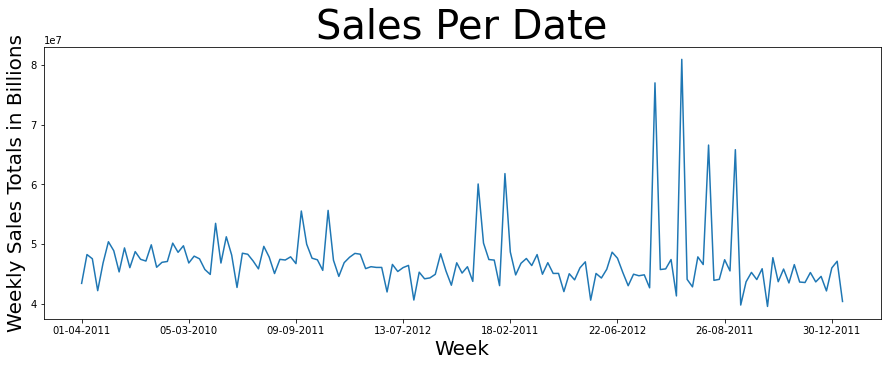

In [17]:
sales = Walmart3.groupby(['Week'])['Sales'].sum()
fig, ax = plt.subplots(figsize=(15,5))
plt.title('Sales Per Date', fontsize = 40)
plt.xlabel('Store Number', fontsize = 20)
plt.ylabel('Weekly Sales Totals in Billions', fontsize = 20)
sales.plot()

# Machine Learning: Regression Models -- Sales Predictions

# TRAIN, TEST, SPLIT

In [18]:
# separate out target: Sales 
# bin target data
import jenkspy
labels_4 = ["0-100,000","100,00-500,000", "500,000-1,000,000","1,000,000-1,500,000","1,500,000-2,000,000","2,000,000-2,500,000","2,500,00-3,000,000","3,000,000-3,500,000","3,500,000-4,000,000",
            "4,000,000-4,500,000","4,500,000-5,000,000","5,000,000-5,500,000","6,000,000-6,500,000","6,500,000-7,000,000","7,000,000-7,500,000",
            "7,500,000-8,000,000","8,000,000-8,500,000","8,500,000-9,000,000","9,500,000-10,000,000","10,000,000-10,500,000","10,500,000-20,000,000","20,000,000-20,500,000",
            "20,500,000-30,000,000","30,000,000-30,500,000","30,500,000-40,000,000","40,000,000-40,500,000","40,500,000-50,000,000","50,000,000-50,500,000","50,500,000-60,000,000",
            "60,000,000-60,500,000","60,500,000-70,000,000","70,000,000-70,500,000", "70,500,000-80,000,000","80,000,000-80,500,000","80,500,000-90,000,000","90,000,000-9,500,000",
            "9,500,000-100,000,000","100,000,000-100,500,000","100,500,000-200,000,000","200,000,000-200,500,000","200,500,000-300,000,000","300,000,000-300,500,000",
            "300,500,000-400,000,000","400,000,000-400,500,000","400,500,000-500,000,000","500,000,000-500,500,000","500,500,000-600,000,000","600,000,000-600,500,000",
            "600,500,000-700,000,000","700,000,000-700,500,000","700,500,000-800,000,000","800,000,000-800,500,000","800,500,000-900,000,000","900,000,000-900,500,000",
            "900,500,000-1,000,000,000","1,000,000,000-1,500,000,000","1,500,000,000-2,000,000,000","2,000,000,000-2,500,000,000","2,500,000,000-3,000,000,000"]
breaks = jenkspy.jenks_breaks(Walmart3["Sales"], nb_class=59)
target = pd.cut(Walmart3["Sales"] , bins=breaks, labels=labels_4, include_lowest=True)

In [19]:
Walmart3.drop(columns=["Week"], inplace=True)

In [20]:
#Walmart3["Month"] = pd.DatetimeIndex(Walmart3['Week']).month

In [21]:
Walmart3.drop(columns=["Sales"], inplace=True)

In [22]:
# split data into test train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Walmart3, target, random_state=1)

In [23]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# RANDOM FOREST MODEL 

Determine projected sales per store based on sales data 

In [25]:
random_forest_model = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)

In [26]:
print(f'Training Score: {random_forest_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {random_forest_model.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.2759477936606588


In [27]:
y_pred = pd.DataFrame(random_forest_model.predict(X_test), index=X_test.index, columns=['Predictions'])
y_pred_df = y_pred.merge(y_test, how='outer', left_index=True, right_index=True)
y_pred_df

,Predictions,Sales
5988,"7,000,000-7,500,000","3,500,000-4,000,000"
2316,"7,000,000-7,500,000","7,500,000-8,000,000"
4543,"7,000,000-7,500,000","40,500,000-50,000,000"
6051,"7,000,000-7,500,000","5,000,000-5,500,000"
3890,"7,000,000-7,500,000","50,000,000-50,500,000"
...,...,...
627,"7,000,000-7,500,000","500,000-1,000,000"
1708,"7,000,000-7,500,000","10,500,000-20,000,000"
1930,"7,000,000-7,500,000","600,000,000-600,500,000"
756,"7,000,000-7,500,000","90,000,000-9,500,000"


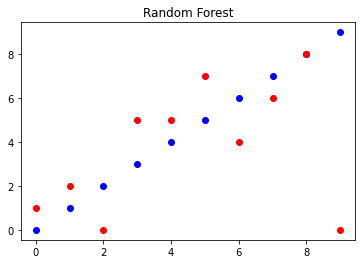

In [48]:
import numpy as np

def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(regressorName)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "Random Forest")

The accuray of this model is low (Random Forest) -- more data is required, let's try Logistic Reggression. 